

<font face="B Mitra" size=4>

<div dir="rtl">
<b>کلاس spline</b>
در این کلاس چندین تابع 
static
وجود دارد که برای ساختن تابع فی ازاین ها استفاده خواهیم کرد.
<br>
تابع B:
این تابع basis است که 
برای تابع 
bspline
از آن استفاده می کنیم که در ادامه توضیح داده خواهد شد.





این متد یک تابع بازگشتی برای محاسبه تابع پایه B-spline از مرتبه k است. پارامترهای این متد به شرح زیر هستند:

x: نقطه‌ای که تابع B-spline در آن ارزیابی می‌شود.
<br>
k: مرتبه B-spline.
<br>
i: شاخص گره.
<br>
t: لیست گره‌ها.
<br>
این متد ابتدا بررسی می‌کند که اگر مرتبه k برابر با 0 باشد، مقدار تابع پایه B-spline را بر اساس گره‌های t تعیین می‌کند. در غیر این صورت، دو مقدار c1 و c2 را محاسبه می‌کند که هر کدام با استفاده از فراخوانی بازگشتی تابع B تعیین می‌شوند. سپس c1 و c2 با هم جمع شده و نتیجه نهایی برگردانده می‌شود.

متد bspline:
<br>
این متد برای محاسبه مقدار B-spline در نقطه x با استفاده از ضرایب c و مرتبه k استفاده می‌شود. پارامترهای ورودی این متد به صورت زیر هستند:

x: نقطه‌ای که B-spline در آن ارزیابی می‌شود.
<br>
start: مقدار ابتدایی گره‌ها.
<br>
end: مقدار انتهایی گره‌ها.
<br>
c: لیست ضرایب.(control points)
<br>
k: مرتبه B-spline.
<br>
این متد ابتدا یک تابع داخلی t تعریف می‌کند که لیست گره‌ها را تولید می‌کند. سپس این لیست گره‌ها را تولید کرده و طول آن را محاسبه می‌کند. اگر x برابر با end باشد، x کمی کاهش یافته و B-spline محاسبه می‌شود. در نهایت، مقدار B-spline به صورت مجموعی از ضرایب c و توابع پایه B-spline محاسبه و برگردانده می‌شود.

متد silu
این متد یک تابع سیگموئید سیلو (SiLU) را محاسبه می‌کند. این تابع نیز به صورت استاتیک تعریف شده و به شرح زیر است:

x:<br>ورودی تابع که باید یک torch.Tensor باشد.
این متد ابتدا بررسی می‌کند که اگر x از نوع torch.Tensor نباشد، آن را به torch.Tensor تبدیل می‌کند. سپس مقدار SiLU محاسبه و برگردانده می‌شود.



</font>





In [4]:
import torch
class Spline:

    @staticmethod
    def B(x, k, i, t):
        if k == 0:
            return 1.0 if t[i] <= x < t[i+1] else 0.0
        if t[i+k] == t[i]:
            c1 = 0.0
        else:
            c1 = (x - t[i])/(t[i+k] - t[i]) * Spline.B(x, k-1, i, t)
        if t[i+k+1] == t[i+1]:
            c2 = 0.0
        else:
            c2 = (t[i+k+1] - x)/(t[i+k+1] - t[i+1]) * Spline.B(x, k-1, i+1, t)
        
        return c1 + c2
    
    @staticmethod
    def bspline(x, start, end, c, k):

        # if not isinstance(x, torch.Tensor):
        #     x = torch.Tensor(x,requires_grad=True)


        def t(first, last, k):
            return [first] * k + list(range(first, last+1)) + [last] * k
        t = t(start, end, k)
        n = len(t) - k - 1

        if x == end:
            x = x - 1e-5
            sum(c[i] * Spline.B(x, k, i, t) for i in range(n))

        # assert (n >= k+1) and (len(c) >= n)
        return sum(c[i] * Spline.B(x, k, i, t) for i in range(n))

    @staticmethod
    def silu(x):
        if not isinstance(x, torch.Tensor):
            x = torch.Tensor(x,requires_grad=True)
            
        return x / (1 + torch.exp(-x))




<font face="B Mitra" size=4>

<div dir="rtl">
<b>نمایش دادن bspline</b>

در این قسمت یک نمونه از تابع bspline را نمایش می دهیم.
که 
control points
های مورد نظر را تعیین می کنیم و وارد می کنیمو بر اساس آن رسم می کنیم.

</font>





1.0
2.5
3.5
4.5
5.99998000005


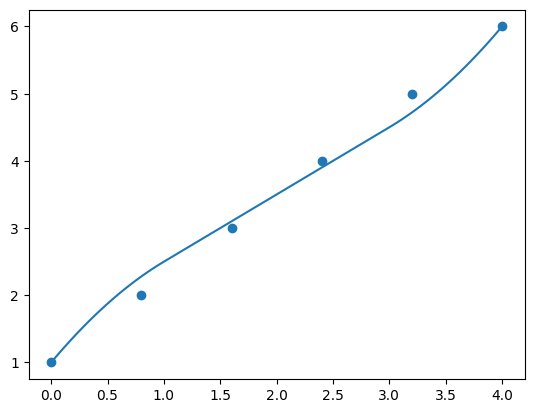

In [5]:
# Test
c = [1.0, 2, 3, 4, 5, 6]
k = 2
for x in range(0, 5):
    print(Spline.bspline(x, 0,4, c, k))
# make plot and show the c
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 4, 100)
y = [Spline.bspline(i, 0,4, c, k) for i in x]
plt.plot(x, y)
x = np.linspace(0, 4, len(c))
y = c
plt.scatter(x, y)
plt.show()






<font face="B Mitra" size=4>

<div dir="rtl">
<b></b>
در این قسمت می خواهیم چک کنیم که ورودی های ما که همان 
tensor
ها هستن در 
bspline
گراف محاسباتی را به درستی انجام می دهند یا خیر. چون در ادامه برای اپدیت کردن نیاز داریم گراف محاسباتی ما به درستی کار کند.

</font>





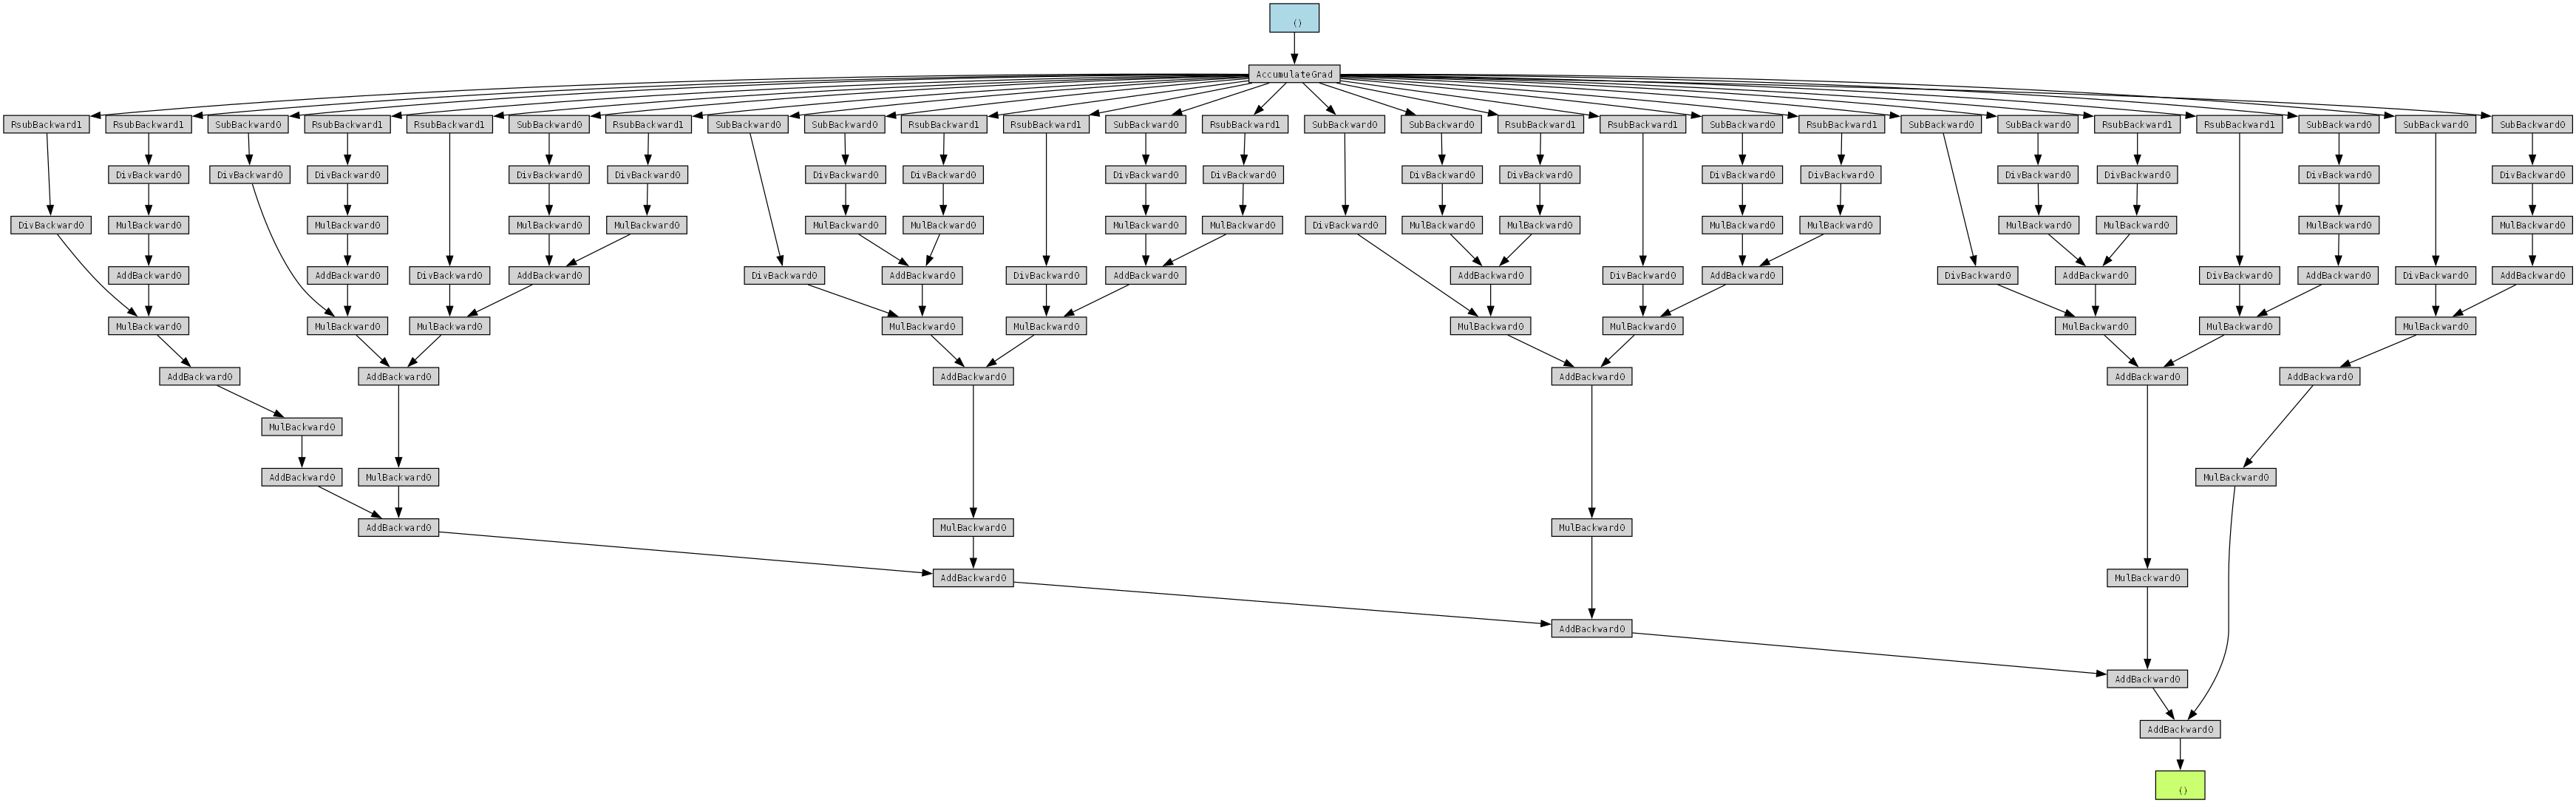

In [6]:
import torch
from torchviz import make_dot

x = torch.tensor(5.0, requires_grad=True)
y = Spline.bspline(x, 0, 4, c, k)


from torchviz import make_dot
graph = make_dot(y )
from IPython.display import Image
Image(graph.render(format='png'))

<font face="B Mitra" size="4">

<div dir="rtl">

<b>توضیحات کلاس Phi</b>
<p>این کلاس در اصل با داشتن بازه و
k
و
تعداد 
control points
تابعی را ایجاد می کند که با گرفتن ورودی ای باید خروجی ای را بدهد و با
اپدیت کردن پارامتر های خود به سمتی می رود که 
loss
را کم کند.


</p>
<b>متد سازنده (__init__)</b>
<p>این متد برای مقداردهی اولیه آبجکت‌های کلاس <code>Phi</code> استفاده می‌شود. پارامترهای ورودی این متد به شرح زیر هستند:</p>
<ul>
    <li><code>start</code>: مقدار ابتدایی گره‌ها برای B-spline.</li>
    <li><code>end</code>: مقدار انتهایی گره‌ها برای B-spline.</li>
    <li><code>k</code>: مرتبه B-spline.</li>
    <li><code>num_c</code>: تعداد ضرایب B-spline.</li>
</ul>
<p>در این متد، پارامترهای زیر به عنوان ویژگی‌های کلاس تعریف می‌شوند:</p>
<ul>
    <li><code>self.start</code> و <code>self.end</code>: مقادیر ابتدایی و انتهایی گره‌ها.</li>
    <li><code>self.k</code>: مرتبه B-spline.</li>
    <li><code>self.c</code>: ضرایب B-spline که به صورت تصادفی با توزیع نرمال با میانگین ۰ و انحراف معیار ۰.۳ مقداردهی اولیه می‌شوند.</li>
    <li><code>self.wb</code> و <code>self.ws</code>: وزن‌های مربوط به ترکیب تابع سیلو و B-spline که به صورت تصادفی مقداردهی اولیه می‌شوند.</li>
</ul>

<b>متد forward</b>
<p>این متد برای محاسبه خروجی کلاس <code>Phi</code> برای یک ورودی <code>x</code> استفاده می‌شود. پارامتر ورودی این متد به شرح زیر است:</p>
<ul>
    <li><code>x</code>: ورودی به تابع که می‌تواند یک عدد یا <code>torch.Tensor</code> باشد.</li>
</ul>
<p>این متد ابتدا بررسی می‌کند که اگر <code>x</code> از نوع <code>torch.Tensor</code> نباشد، آن را به <code>torch.Tensor</code> تبدیل کند. سپس خروجی به صورت ترکیبی از تابع سیلو و B-spline محاسبه می‌شود. ترکیب به صورت زیر است:</p>
<p><code>خروجی = self.wb * Spline.silu(x) + self.ws * Spline.bspline(x, self.start, self.end, self.c, self.k)</code></p>
<p>
قسمت
<code>self.wb * Spline.silu(x)</code>
همان قسمت بایاس است که 
Wb
در آن باید آپدیت شود.
</p>

<b>متد __call__</b>
<p>این متد برای این طراحی شده است که بتوان از آبجکت‌های کلاس <code>Phi</code> به عنوان یک تابع استفاده کرد. این متد به سادگی متد <code>forward</code> را فراخوانی کرده و خروجی آن را برمی‌گرداند.</p>

<b>متد parameters</b>
<p>این متد لیستی از پارامترهای قابل آموزش کلاس <code>Phi</code> را برمی‌گرداند. این پارامترها شامل ضرایب B-spline (<code>self.c</code>) و وزن‌های ترکیب (<code>self.wb</code> و <code>self.ws</code>) می‌باشند.</p>

<b>نکات اضافی</b>
<ul>
    <li>تمامی پارامترهای قابل آموزش با استفاده از ویژگی <code>requires_grad=True</code> به گونه‌ای تعریف شده‌اند که در فرآیند آموزش شبکه عصبی، قابلیت محاسبه گرادیان و به‌روزرسانی داشته باشند.</li>
    <li>کتابخانه <code>torch</code> برای عملیات‌های عددی و محاسبات گرادیان مورد استفاده قرار گرفته است.</li>
</ul>

</div>

</font>

In [7]:
import torch
class Phi():
    def __init__(self, start, end, k, num_c):
        self.start = start
        self.end = end
        self.k = k
        self.c = torch.normal(0, 0.3, (num_c,), requires_grad=True)
        self.wb = torch.randn(1, requires_grad=True)
        self.ws = torch.randn(1, requires_grad=True)


    def forward(self, x):
        if not isinstance(x, torch.Tensor):
            x = torch.tensor(x, dtype=torch.float32 ,requires_grad=True)
        return self.wb * Spline.silu(x) + self.ws * Spline.bspline(x, self.start, self.end, self.c, self.k)
    
    def __call__(self, x):
        return self.forward(x)

    def parameters(self):
        return [self.c, self.wb, self.ws]



<font face="B Mitra" size=4>

<div dir="rtl">
در این قسمت گراف محاسباتی متناظر با یک 
phi
را تعریف می کنیم و چک می کنیم که آیا این گراف محاسباتی به درستی کار می کند یا خیر.
</font>


[tensor([-0.2895,  0.0064, -0.2580, -0.0800, -0.0803, -0.1037],
       requires_grad=True), tensor([0.0729], requires_grad=True), tensor([-0.7396], requires_grad=True)]


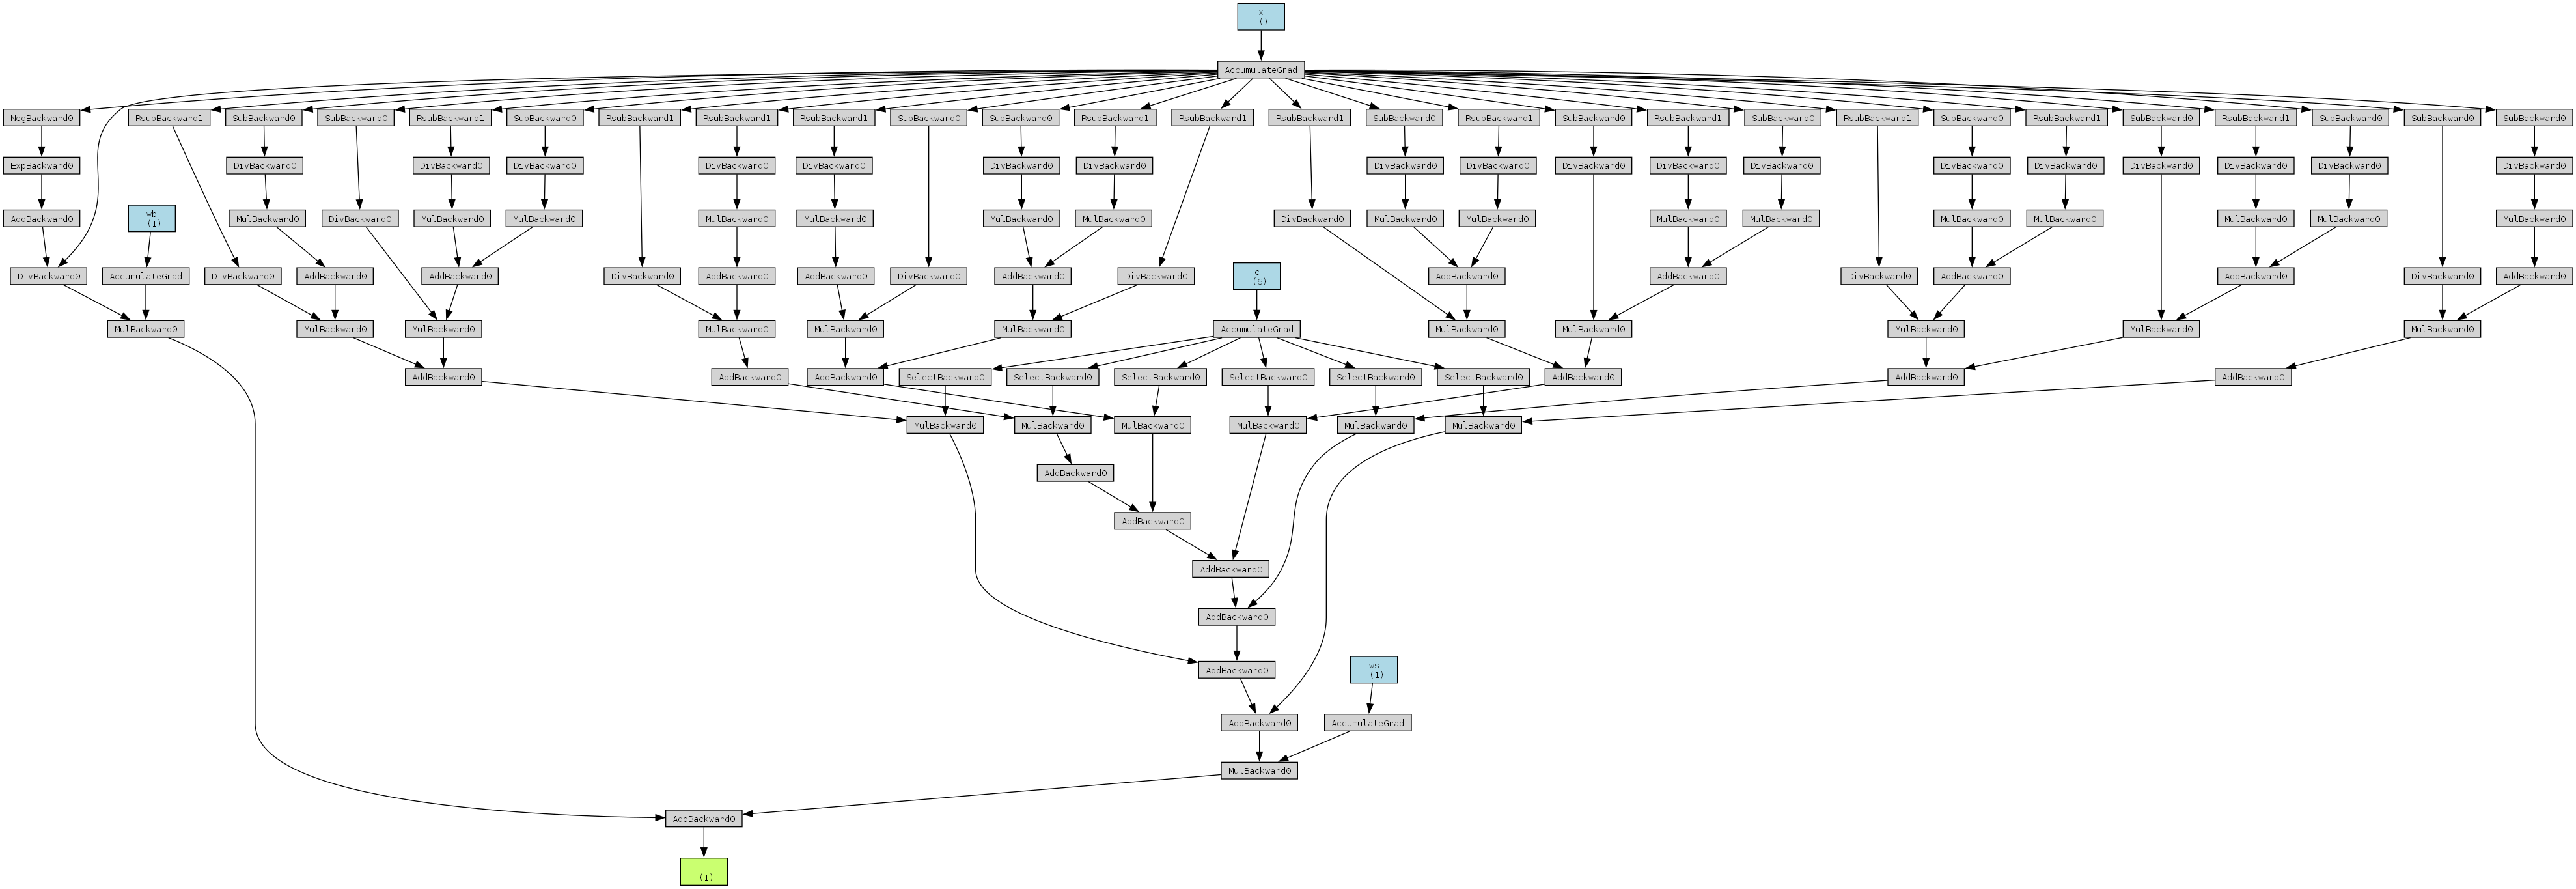

In [8]:
phi = Phi(0, 4, 2, 6)
x = torch.tensor(5.0, requires_grad=True)
y = phi.forward(x)

print(phi.parameters())

from torchviz import make_dot
graph = make_dot(y,params= {'x':x, 'c':phi.c, 'wb':phi.wb, 'ws':phi.ws})
from IPython.display import Image
Image(graph.render(format='png'))

<font face="B Mitra" size=4>

<div dir="rtl">
در اینجا لایه هارا تعریف می کنیم که به اسن صورت است که در اصل لیستی از ابجکت های 
phi
است که هر کدام یک تابع را تعریف می کنند.
و هر کدام پارامتر های خود را دارند که باید در فرآیند آموزش بهینه شوند.
و در اخر آن 
phi
هایی که به اصطلاح به یک نود می رسند با هم جمع می شوند.
در اصل هر به ازای هر ورودی به هر خروجی یک تابع 
phi
تعریف می شود که این تابع ها به اصطلاح به یک نود می رسند.
پس در کل به 
input_size * output_size
تابع
phi
نیاز داریم.
</font>

<font face="B Mitra" size="4">

<div dir="rtl">

<b>توضیحات کلاس Layer</b>

<b>متد سازنده (__init__)</b>
<p>این متد برای مقداردهی اولیه آبجکت‌های کلاس <code>Layer</code> استفاده می‌شود. پارامترهای ورودی این متد به شرح زیر هستند:</p>
<ul>
    <li><code>inputSize</code>: تعداد ورودی‌های لایه.</li>
    <li><code>outputSize</code>: تعداد خروجی‌های لایه.</li>
    <li><code>start</code>: مقدار ابتدایی گره‌ها برای B-spline (پیش‌فرض ۰).</li>
    <li><code>end</code>: مقدار انتهایی گره‌ها برای B-spline (پیش‌فرض ۴).</li>
    <li><code>k</code>: مرتبه B-spline (پیش‌فرض ۲).</li>
    <li><code>num_c</code>: تعداد ضرایب B-spline (پیش‌فرض ۶).</li>
</ul>
<p>در این متد، یک ماتریس دو بعدی از کلاس‌های <code>Phi</code> ایجاد می‌شود که ابعاد آن <code>outputSize</code> در <code>inputSize</code> است.</p>

<b>متد forward</b>
<p>این متد برای محاسبه خروجی لایه <code>Layer</code> برای یک ورودی <code>x</code> استفاده می‌شود. پارامتر ورودی این متد به شرح زیر است:</p>
<ul>
    <li><code>x</code>: ورودی به لایه که می‌تواند یک لیست یا <code>torch.Tensor</code> باشد.</li>
</ul>
<p>این متد ابتدا بررسی می‌کند که اگر <code>x</code> از نوع <code>torch.Tensor</code> نباشد، آن را به <code>torch.Tensor</code> تبدیل کند. سپس خروجی هر نود محاسبه شده و در لیستی قرار می‌گیرد. خروجی‌های هر نود از طریق جمع کردن خروجی‌های کلاس‌های <code>Phi</code> مربوط به آن نود به دست می‌آید. در نهایت، خروجی‌ها به صورت یک <code>torch.Tensor</code> بازگشت داده می‌شوند.</p>

<b>متد __call__</b>
<p>این متد برای این طراحی شده است که بتوان از آبجکت‌های کلاس <code>Layer</code> به عنوان یک تابع استفاده کرد. این متد به سادگی متد <code>forward</code> را فراخوانی کرده و خروجی آن را برمی‌گرداند.</p>

<b>متد parameters</b>
<p>این متد لیستی از پارامترهای قابل آموزش تمامی کلاس‌های <code>Phi</code> در لایه <code>Layer</code> را برمی‌گرداند. این پارامترها شامل ضرایب B-spline و وزن‌های ترکیب مربوط به هر کلاس <code>Phi</code> در ماتریس <code>phis</code> می‌باشند.</p>

<b>نکات اضافی</b>
<ul>
    <li>تمامی پارامترهای قابل آموزش با استفاده از ویژگی <code>requires_grad=True</code> به گونه‌ای تعریف شده‌اند که در فرآیند آموزش شبکه عصبی، قابلیت محاسبه گرادیان و به‌روزرسانی داشته باشند.</li>
    <li>کتابخانه <code>torch</code> برای عملیات‌های عددی و محاسبات گرادیان مورد استفاده قرار گرفته است.</li>
</ul>

</div>

</font>

In [9]:
class Layer():
    def __init__(self, inputSize, outputSize, start = 0, end = 4, k = 2, num_c = 6):
        self.inputSize = inputSize
        self.outputSize = outputSize
        self.phis = []
        for i in range(outputSize):
            for j in range(inputSize):
                if j == 0:
                    self.phis.append([])
                self.phis[i].append(Phi(start, end, k, num_c))
    
    def forward(self, x):
        self.output = [0 for _ in range(self.outputSize)]
        if not isinstance(x, torch.Tensor):
            x = torch.tensor(x, dtype=torch.float32 ,requires_grad=True)
        for i in range(self.outputSize):
            for j in range(self.inputSize):
                self.output[i] += self.phis[i][j](x[j])
        return torch.stack(self.output)
    
    def __call__(self, x):
        return self.forward(x)
    
    def parameters(self):
        parameters = []
        for i in range(self.outputSize):
            for j in range(self.inputSize):
                for parameter in self.phis[i][j].parameters():
                    parameters.append(parameter)
        return parameters
        
  

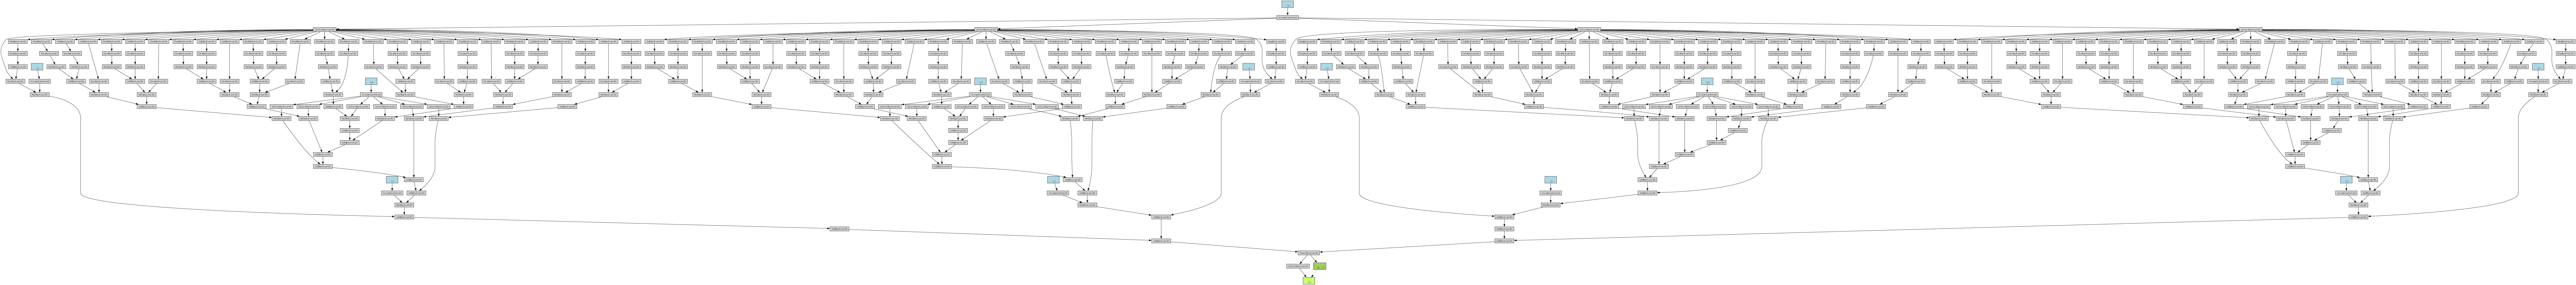

In [10]:
layer = Layer(2, 2)
x = torch.tensor([5.0, 6.0], requires_grad=True)
y = layer.forward(x)

from torchviz import make_dot
graph = make_dot(y[0])
from IPython.display import Image
Image(graph.render(format='png'))


<font face="B Mitra" size=4>

<div dir="rtl">
در این قسمت کلاس
kan
را ساخته ایم
که با توجه به ورودی ها تعداد لایه مورد نظر لایه ایجاد می کند در همان بازه ای دریافت می کندتمام لایه هارا در همان بازه می سازد
و یک 
forward
برای این کلاس تعریف می کنیم که با گرفتن ورودی ها و خروجی ها از هر لایه مقدار خروجی را محاسبه می کند.
و یک
batch_forward
که برای محاسبه خروجی ها برای یک بچ از داده ها استفاده می شود.

</font>

<font face="B Mitra" size="4">

<div dir="rtl">

<b>توضیحات کلاس Kan</b>

<b>متد سازنده (__init__)</b>
<p>این متد برای مقداردهی اولیه آبجکت‌های کلاس <code>Kan</code> استفاده می‌شود. پارامترهای ورودی این متد به شرح زیر هستند:</p>
<ul>
    <li><code>inputSize</code>: تعداد ورودی‌های شبکه.</li>
    <li><code>layerSizes</code>: لیستی از اندازه‌های هر لایه در شبکه.</li>
    <li><code>start</code>: مقدار ابتدایی گره‌ها برای B-spline (پیش‌فرض ۰).</li>
    <li><code>end</code>: مقدار انتهایی گره‌ها برای B-spline (پیش‌فرض ۴).</li>
    <li><code>k</code>: مرتبه B-spline (پیش‌فرض ۲).</li>
    <li><code>num_c</code>: تعداد ضرایب B-spline (پیش‌فرض ۶).</li>
</ul>
<p>در این متد، چندین لایه از نوع <code>Layer</code> ایجاد می‌شود و در لیستی به نام <code>layers</code> ذخیره می‌شود. لایه اول با استفاده از <code>inputSize</code> و بقیه لایه‌ها با استفاده از اندازه لایه قبلی ساخته می‌شوند.</p>

<b>متد forward</b>
<p>این متد برای محاسبه خروجی شبکه <code>Kan</code> برای یک ورودی <code>x</code> استفاده می‌شود. پارامتر ورودی این متد به شرح زیر است:</p>
<ul>
    <li><code>x</code>: ورودی به شبکه که می‌تواند یک لیست یا <code>torch.Tensor</code> باشد.</li>
</ul>
<p>این متد ورودی <code>x</code> را از طریق تمامی لایه‌های شبکه عبور می‌دهد و خروجی نهایی را بازمی‌گرداند. در نهایت، خروجی با استفاده از تابع <code>torch.squeeze</code> به یک ابعاد کاهش می‌یابد.</p>

<b>متد batch_forward</b>
<p>این متد برای محاسبه خروجی شبکه برای یک دسته (batch) از ورودی‌ها استفاده می‌شود. پارامتر ورودی این متد به شرح زیر است:</p>
<ul>
    <li><code>x</code>: یک <code>torch.Tensor</code> شامل چندین ورودی.</li>
</ul>
<p>این متد برای هر ورودی در دسته، متد <code>forward</code> را فراخوانی کرده و خروجی‌ها را در یک لیست جمع‌آوری می‌کند. سپس خروجی‌ها به صورت یک <code>torch.Tensor</code> بازمی‌گردند.</p>

<b>متد __call__</b>
<p>این متد برای این طراحی شده است که بتوان از آبجکت‌های کلاس <code>Kan</code> به عنوان یک تابع استفاده کرد. این متد به سادگی متد <code>batch_forward</code> را فراخوانی کرده و خروجی آن را برمی‌گرداند.</p>

<b>متد parameters</b>
<p>این متد لیستی از پارامترهای قابل آموزش تمامی لایه‌های <code>Layer</code> در شبکه <code>Kan</code> را برمی‌گرداند. این پارامترها شامل تمامی پارامترهای قابل آموزش در هر لایه از شبکه می‌باشند.</p>

<b>نکات اضافی</b>
<ul>
    <li>تمامی پارامترهای قابل آموزش با استفاده از ویژگی <code>requires_grad=True</code> به گونه‌ای تعریف شده‌اند که در فرآیند آموزش شبکه عصبی، قابلیت محاسبه گرادیان و به‌روزرسانی داشته باشند.</li>
    <li>کتابخانه <code>torch</code> برای عملیات‌های عددی و محاسبات گرادیان مورد استفاده قرار گرفته است.</li>
</ul>

</div>

</font>

In [11]:
class Kan:
    def __init__(self, inputSize, layerSizes, start = 0, end = 4, k = 2, num_c = 6):
        self.inputSize = inputSize
        self.layerSizes = layerSizes
        self.layers = []
        for i in range(len(layerSizes)):
            if i == 0:
                self.layers.append(Layer(inputSize, layerSizes[i], start, end, k, num_c))
            else:
                self.layers.append(Layer(layerSizes[i-1], layerSizes[i], start, end, k, num_c))
        
    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return torch.squeeze(x)
    
    def batch_forward(self, x):
        output = []
        for i in range(x.shape[0]):
            output.append(self.forward(x[i]))
      
        return torch.stack(output)
    
    def __call__(self, x):
        return self.batch_forward(x)  
    
    def parameters(self):
        parameters = []
        for layer in self.layers:
            for parameter in layer.parameters():
                parameters.append(parameter)
        return parameters
    
    
        

<font face="B Mitra" size=4>

<div dir="rtl">
loss
را به صورت 
MSE
خودمان تعریف می کنیم .
</font>

In [12]:
class Loss:
    
    @staticmethod
    def mse(y, y_hat):
        return torch.mean((y - y_hat)**2)

<font face="B Mitra" size=4>

<div dir="rtl">
در این قسمت تابع 
make_batch
را تعریف می کنیم که برای این که بتوانیم داده ها را به صورت بچ ها به شبکه وارد کنیم از آن استفاده می کنیم.

</font>

In [13]:
import math
def make_batchs(X, Y, batch_size):
    X = np.array_split(X, len(X)/batch_size)
    Y = np.array_split(Y, len(Y)/batch_size)
    return X, Y

X = np.linspace(-10, 10, 50)

Y = [math.exp(math.sin(x)) for x in X]



<font face="B Mitra" size=4>

<div dir="rtl">
ابتدا دیتا را میسازیم و 
kan را
می سازیم و بعد از آن
optimizer
را می سازیم و بعد از آن
train
را انجام می دهیم.
و در ادامهع خود داده ها را به صورت نومدار و نمودار خروجی آن ها و حدس آن ها توسط شبکه را رسم می کنیم.
</font>

In [14]:
import math
kan = Kan(inputSize=1 ,layerSizes= [1],start=-10, end = 10, k=2, num_c=23)


optimizer = torch.optim.Adam(kan.parameters(), lr=0.005)
# create data
X = np.linspace(-10, 10, 100)
X = [[i] for i in X]

Y = [math.exp(math.sin(x[0])) for x in X]
Y = [[y] for y in Y]

X, Y = make_batchs(X, Y, 2)





# training
for epoch in range(30):
    cost = 0
    for i in range(len(X)):
        x = torch.tensor(X[i], requires_grad=True)
        y = kan(x)
      
        
        loss = Loss.mse(y, torch.tensor(Y[i], requires_grad=True))
    
        
        cost += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Cost at epoch {epoch} : {cost.item()}')



Cost at epoch 0 : 263.77857299925694
Cost at epoch 1 : 154.24806872621247
Cost at epoch 2 : 99.57849162151393
Cost at epoch 3 : 70.05177061675772
Cost at epoch 4 : 53.290676274445914
Cost at epoch 5 : 41.87683573262196
Cost at epoch 6 : 32.58280929113713
Cost at epoch 7 : 24.645620451916635
Cost at epoch 8 : 18.049241807963067
Cost at epoch 9 : 12.851614245842372
Cost at epoch 10 : 9.015840038435933
Cost at epoch 11 : 6.356007934310355
Cost at epoch 12 : 4.593043180902164
Cost at epoch 13 : 3.451021219479665
Cost at epoch 14 : 2.7131993855670715
Cost at epoch 15 : 2.230018152047641
Cost at epoch 16 : 1.905306153297833
Cost at epoch 17 : 1.679453882724939
Cost at epoch 18 : 1.51614916954564
Cost at epoch 19 : 1.3934121316918933
Cost at epoch 20 : 1.2979270404219676
Cost at epoch 21 : 1.2215463237732538
Cost at epoch 22 : 1.1591790242169129
Cost at epoch 23 : 1.107532620756955
Cost at epoch 24 : 1.0643784468354887
Cost at epoch 25 : 1.028130256948617
Cost at epoch 26 : 0.9976044535258477

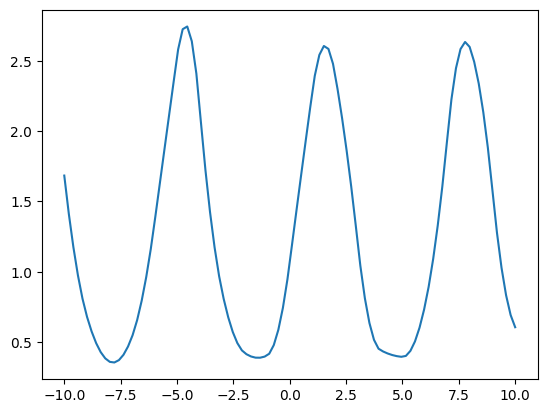

In [15]:
X = np.linspace(-10, 10, 100)
X = [[i] for i in X]


x = torch.tensor(X, requires_grad=True)
        # print(x)
Y = kan(x)

Y = [y.item() for y in Y]

plt.plot(X, Y)
plt.show()



In [16]:
import math
kan = Kan(inputSize=2 ,layerSizes= [1],start=-5, end = 5, k=3, num_c=13)


# create optimizer
optimizer = torch.optim.Adam(kan.parameters(), lr=0.008)
# create data random from -5 to 5
x1 = np.random.uniform(-5, 5, 400)
x2 = np.random.uniform(-5, 5, 400)
X = [[x1[i], x2[i]] for i in range(400)]

Y = [(math.sin(x1[i]) + math.cos(x2[i])) for i in range(400)]



In [17]:
# shoe this 3d plot
import plotly.graph_objects as go
import numpy as np
fig = go.Figure(data=[go.Scatter3d(x=x1, y=x2, z=Y, mode='markers')])
fig.show()


In [18]:
# training
X, Y = make_batchs(X, Y, 10)
for epoch in range(35):
    cost = 0
    for i in range(len(X)):
        x = torch.tensor(X[i], requires_grad=True)
        # print(x)
        y = kan(x)

        
        
        loss = Loss.mse(y, torch.tensor(Y[i], requires_grad=True))
        # print(Y[i])
        
        cost += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Cost at epoch {epoch} : {cost.item()}')

Cost at epoch 0 : 124.3851963423578
Cost at epoch 1 : 50.26395629715874
Cost at epoch 2 : 14.116158496316789
Cost at epoch 3 : 3.495048313032659
Cost at epoch 4 : 1.0451029418570694
Cost at epoch 5 : 0.48588291912419707
Cost at epoch 6 : 0.3091683566551661
Cost at epoch 7 : 0.21955433020320486
Cost at epoch 8 : 0.16250397137940392
Cost at epoch 9 : 0.12208483837943045
Cost at epoch 10 : 0.09213156467496116
Cost at epoch 11 : 0.0695658139333499
Cost at epoch 12 : 0.05248171738128643
Cost at epoch 13 : 0.03954251983056624
Cost at epoch 14 : 0.02975496029446819
Cost at epoch 15 : 0.02236317106169098
Cost at epoch 16 : 0.01678788949347676
Cost at epoch 17 : 0.012586135213142306
Cost at epoch 18 : 0.009420335299833342
Cost at epoch 19 : 0.007035691231917397
Cost at epoch 20 : 0.005240177311147291
Cost at epoch 21 : 0.0038898399755643645
Cost at epoch 22 : 0.0028765332321019016
Cost at epoch 23 : 0.002118664680680115
Cost at epoch 24 : 0.001554479606691837
Cost at epoch 25 : 0.00113694769529

In [19]:
x1 = np.random.uniform(-5, 5, 400)
x2 = np.random.uniform(-5, 5, 400)
X = [[x1[i], x2[i]] for i in range(400)]




x = torch.tensor(X, requires_grad=True)
        # print(x)
Y = kan(x)


Y = [y.item() for y in Y]

# shoe this 3d plot with plotly
import plotly.graph_objects as go
import numpy as np
fig = go.Figure(data=[go.Scatter3d(x=x1, y=x2, z=Y, mode='markers')])
fig.show()










In [20]:
# use go surface to show the surface
x1 = np.linspace(-5, 5, 40)
x2 = np.linspace(-5, 5, 40)
X = [[x1[i], x2[j]] for i in range(len(x1)) for j in range(len(x2))]
x = torch.tensor(X, requires_grad=True)
Y = kan(x)
# Y = [y.item() for y in Y]
fig = go.Figure(data=[go.Surface(x=x1, y=x2, z=Y.detach().numpy().reshape(40,40))])
fig.show()


In [40]:
import math
kan = Kan(inputSize=2 ,layerSizes= [1],start=-10, end = 10, k=3, num_c=23)


# create optimizer
optimizer = torch.optim.Adam(kan.parameters(), lr=0.02)
# create data random from -5 to 5
x1 = np.random.uniform(-5, 5, 400)
x2 = np.random.uniform(-5, 5, 400)
X = [[x1[i], x2[i]] for i in range(400)]

Y = [(math.exp(x1[i]) - math.exp(x2[i])) for i in range(400)]


In [41]:
# shoe this 3d plot
import plotly.graph_objects as go
import numpy as np
fig = go.Figure(data=[go.Scatter3d(x=x1, y=x2, z=Y, mode='markers')])
fig.show()


In [42]:
# training
X, Y = make_batchs(X, Y, 10)
for epoch in range(35):
    cost = 0
    for i in range(len(X)):
        x = torch.tensor(X[i], requires_grad=True)
        # print(x)
        y = kan(x)

        
        
        loss = Loss.mse(y, torch.tensor(Y[i], requires_grad=True))
        # print(Y[i])
        
        cost += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Cost at epoch {epoch} : {cost.item()}')

Cost at epoch 0 : 73058.66836778319
Cost at epoch 1 : 65488.78113499813
Cost at epoch 2 : 55438.9478179101
Cost at epoch 3 : 44101.315280954936
Cost at epoch 4 : 33288.518289929976


In [ ]:
x1 = np.random.uniform(-5, 5, 400)
x2 = np.random.uniform(-5, 5, 400)
X = [[x1[i], x2[i]] for i in range(400)]




x = torch.tensor(X, requires_grad=True)
        # print(x)
Y = kan(x)


Y = [y.item() for y in Y]

# shoe this 3d plot with plotly
import plotly.graph_objects as go
import numpy as np
fig = go.Figure(data=[go.Scatter3d(x=x1, y=x2, z=Y, mode='markers')])
fig.show()

In [ ]:
# use go surface to show the surface
x1 = np.linspace(-5, 5, 40)
x2 = np.linspace(-5, 5, 40)
X = [[x1[i], x2[j]] for i in range(len(x1)) for j in range(len(x2))]
x = torch.tensor(X, requires_grad=True)
Y = kan(x)
# Y = [y.item() for y in Y]
fig = go.Figure(data=[go.Surface(x=x1, y=x2, z=Y.detach().numpy().reshape(40,40))])
fig.show()